In [1]:
import pandas as pd

data = pd.read_csv('../data_pca_6_components.csv', header=None, sep=' ')

In [2]:
labels = pd.read_csv('../db/clase.txt', header=None)

In [3]:
print(data)

                                                       0
0                                PC1,PC2,PC3,PC4,PC5,PC6
1      22.534268188497318,1.9337042475911395,-3.43185...
2      -9.788465910188643,-0.9395021742789317,-0.8305...
3      3.520281747889219,-1.5177525046477258,1.960280...
4      27.726211378994336,-0.6004380181676845,0.22688...
...                                                  ...
22211  -3.478319494814246,-2.0696448369607614,0.09694...
22212  -5.546945285927173,0.30264989609102694,-2.7070...
22213  4.110334206311509,-1.8263863227921673,-1.35682...
22214  10.255731430242722,1.718281958442873,0.7408692...
22215  4.1958009492449735,-0.21142393603700757,-0.401...

[22216 rows x 1 columns]


In [5]:
print(labels)

         0         1
0      NaN         x
1      1.0    kidney
2      2.0    kidney
3      3.0    kidney
4      4.0    kidney
..     ...       ...
185  185.0  placenta
186  186.0  placenta
187  187.0  placenta
188  188.0  placenta
189  189.0  placenta

[190 rows x 2 columns]


# normalizando data

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler  # Agregamos la importación

skip_rows = 1  # omitir la primera fila
data = pd.read_csv('../db/dataset_tissue.txt', skiprows=skip_rows, header=None, sep=',')  # Cambiar el separador a ','

# Eliminar la primera columna que contiene identificadores de genes
data = data.iloc[:, 1:]

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a tus datos
normalized_data = scaler.fit_transform(data)

# Especificar el número de componentes principales a retener
n_components = 10

# Crear una instancia de PCA con el número de componentes
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos con PCA
data_pca = pca.fit_transform(normalized_data)


In [7]:
print(data_pca)

[[ 4.00348016  0.33857487 -0.6251264  ... -0.05279413 -0.08566269
   0.39024206]
 [-1.73972518 -0.16959045 -0.14137785 ... -0.05424737  0.09434474
   0.06035874]
 [ 0.60699112 -0.26259399  0.3345809  ...  0.13180037  0.12405803
   0.05959487]
 ...
 [ 0.70591661 -0.32843881 -0.26138034 ...  0.07785849 -0.04572555
  -0.00986342]
 [ 1.81609239  0.31259468  0.11254222 ...  0.24398219 -0.05425589
   0.32945206]
 [ 0.74111991 -0.03251617 -0.0723081  ...  0.12945562  0.03598081
  -0.01200511]]


In [4]:
import matplotlib.pyplot as plt

# Extraer los dos primeros componentes principales
component1 = data_pca[:, 0]
component2 = data_pca[:, 1]

# Dibuja un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(component1, component2, alpha=0.5)
plt.title('Gráfico de dispersión de los dos primeros componentes principales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()


NameError: name 'data_pca' is not defined

# K-Means

In [9]:
import random
import numpy as np

#Devuelve la distancia entre 2 vectores.
def distance(v1,v2):
  return np.linalg.norm(v1 - v2)

In [10]:
# Inicialice los k centroides tomando aleatoriamente k elementos de los datos para que cada
# centroide tenga una ubicación inicial en el espacio de características.
def Init_Centroide(data, k):
    centroides = set()
    num_pixels = data.shape[0]

    while len(centroides) < k:
        rand_index = np.random.randint(0, num_pixels)
        centroid = tuple(data[rand_index])
        centroides.add(centroid)
        centroides_iniciales = np.array(list(centroides))
    return centroides_iniciales

In [11]:
# Dado que los grupos se han formado previamente, se pueden obtener nuevos
# centroides calculando el vector promedio de cada grupo.

def return_new_centroide(grupos, data,k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[grupos == i]
        if len(points_in_cluster) == 0:
            new_centroid = data[np.random.choice(data.shape[0], 1, replace=False)]
        else:
            new_centroid = np.mean(points_in_cluster, axis=0)
        print(f"New centroid for cluster {i}: {new_centroid}")
        new_centroids.append(new_centroid)
    return np.array(new_centroids, dtype=object)

In [12]:
# La función devuelve un vector de números entre 0 y k-1, donde cada valor indica la clase
# a la que pertenece cada elemento del dataset.
def get_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = [distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

In [13]:
# Halla la distancia promedio entre los antiguos centroides y los nuevos centroides para evaluar
# la convergencia del algoritmo K-Means y determinar si se debe continuar con la iteración.
def distancia_promedio_centroides(old_centroide, new_centroide):
    suma_d= 0
    if old_centroide.shape != new_centroide.shape:
        raise ValueError("Las dimensiones deben coincidir")
    for i in range(old_centroide.shape[0]):
        suma_d += distance(old_centroide[i], new_centroide[i])
    return suma_d / old_centroide.shape[0]

In [14]:
# Este es el algoritmo K-Means. Debe retornar los centroides y los clusters
# generados para poder utilizarlos en análisis posteriores.
def kmeans(data, k, umbral):
  centroides =  Init_Centroide(data,k)
  clusters   =  get_cluster(data,centroides)
  new_centroides = return_new_centroide(clusters, data,k)
  print("old", centroides)
  print("new", new_centroides)
  while(distancia_promedio_centroides(centroides, new_centroides) > umbral):
     print("CENTROIDES", centroides,distancia_promedio_centroides(centroides, new_centroides))
     centroides = new_centroides
     clusters   =  get_cluster(data,centroides)
     new_centroides = return_new_centroide(clusters, data,k)

  return new_centroides, clusters

In [15]:
# A cada imagen le corresponde un único valor de cluster, y a cada cluster se le asigna un color. Luego, grafique la imagen
# recoloreando los píxeles según el cluster al que pertenecen.
import numpy as np
from matplotlib.pyplot import imshow

def Show_Imagen(imagen, cluster):
    cluster = cluster.astype(int)  # Convertir el cluster a tipo entero
    num_clusters = len(np.unique(cluster))
    colors = np.random.randint(0, 255, size=(num_clusters, 3))
    colored_image = colors[cluster]
    plt.axis('off')
    imshow(colored_image)

In [16]:
roids, clusters = kmeans(data_pca, 3, 4.5)new_cent

New centroid for cluster 0: [-3.24177700e+00  4.75331284e-03 -4.23742973e-02 -4.79142934e-02
 -6.24295464e-03 -2.07500484e-02 -2.06706728e-02 -2.49101774e-02
 -3.42200187e-03 -2.51416482e-03]
New centroid for cluster 1: [ 1.92555465e+00 -1.50373310e-02  6.28792527e-03 -5.63806949e-03
  3.32973779e-03  1.01613050e-02  3.42529875e-03 -2.04172649e-04
 -1.14828266e-03 -1.28574599e-03]
New centroid for cluster 2: [-1.2295951   0.01575673  0.00549885  0.02078179 -0.00193556 -0.00539835
  0.00227343  0.00768879  0.00233605  0.00222138]
old [[-3.65888028  0.03726959 -0.07975295 -0.05684088  0.01713577 -0.00545665
  -0.0511998  -0.0299459  -0.0171715  -0.00536518]
 [ 1.015574   -0.4781688   0.27553218 -0.37930583 -0.03002427  0.76550825
   0.63587263 -0.323041   -0.62899696 -0.01212129]
 [-1.6440749  -0.04615405 -0.00991034  0.03607165  0.07424706  0.11563053
   0.05848186 -0.02005379  0.03014885  0.04313803]]
new [[-3.2417770018809664 0.0047533128419032285 -0.04237429728818922
  -0.04791429341

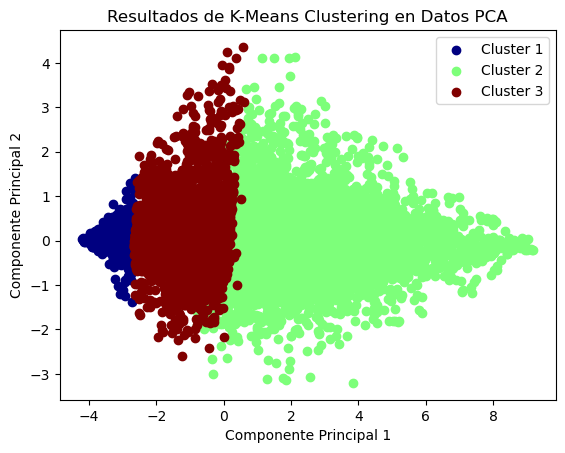

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista de colores para cada clúster
num_clusters = len(np.unique(clusters))
colors = plt.cm.jet(np.linspace(0, 1, num_clusters))

# Graficar los datos en el espacio PCA y colorearlos según el clúster al que pertenecen
for cluster_id in range(num_clusters):
    plt.scatter(data_pca[clusters == cluster_id, 0], data_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id+1}', c=[colors[cluster_id]])

# Agregar etiquetas y leyenda
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Resultados de K-Means Clustering en Datos PCA')

plt.show()